<a href="https://colab.research.google.com/github/Meghana0110/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

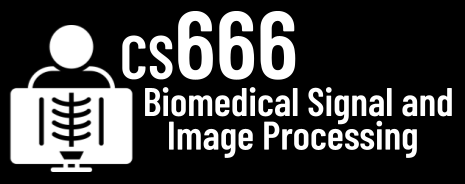

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
import biosppy
import numpy as np
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
with open('ecg.txt') as f:
  x = 0
  for line in f:
    x = (x+1)

  SAMPLING_RATE = metadata["sampling_rate"]
  SECONDS = x/SAMPLING_RATE
  
  print("Sampling Rate:" , str(SAMPLING_RATE))
  print("Seconds lasted:" , str(SECONDS))
  


Sampling Rate: 1000.0
Seconds lasted: 15.004


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
output = biosppy.signals.ecg.ecg(signal=signal,sampling_rate=SAMPLING_RATE,show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

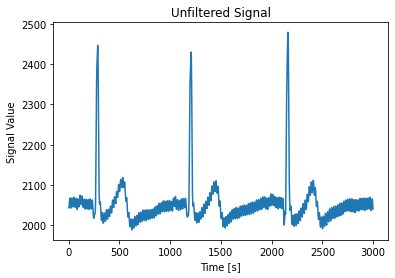

In [ ]:
plt.plot(signal[0:3000])
plt.title("Unfiltered Signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")
plt.show()



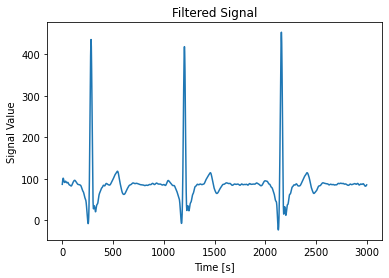

In [ ]:
plt.plot(output["filtered"][0:3000])
plt.title("Filtered Signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0, 0.5, 'Signal Value')

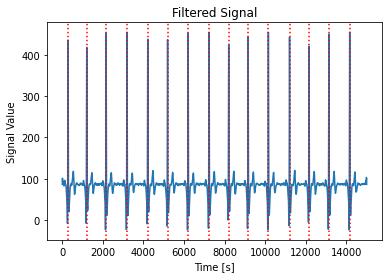

In [ ]:
christov_segmenter = biosppy.signals.ecg.christov_segmenter(signal=signal, sampling_rate=SAMPLING_RATE)
plt.plot(output["filtered"])
for rpeak in christov_segmenter["rpeaks"]:
    plt.axvline(x = rpeak, color = 'r', ls=':')
plt.title("Filtered Signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


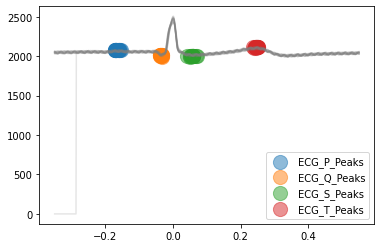

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_, waves_peak = nk.ecg_delineate(signal, 
                                 christov_segmenter["rpeaks"], 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Does the detection work well?

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


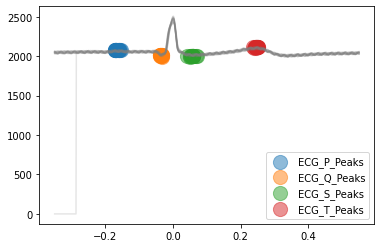

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(signal, 
                                 christov_segmenter["rpeaks"], 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

filtered_signal = nk.signal_filter(signal, lowcut=0.5,highcut=40, method="butterworth",
                    order=2)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


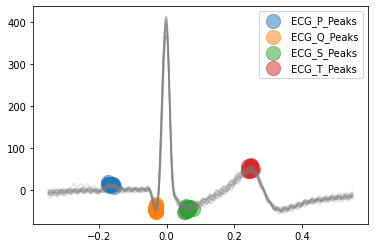

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(filtered_signal, 
                                 christov_segmenter["rpeaks"], 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#